# Discrete Mathematics 2: Lecture 3

submitted by Daphne Lyra Surigao <br> CIS 1203 Group 2 TTh 12:00-1:30

$\textbf{1. Graphs}$
-

Using the definition of a graph which is:
- A graph $G$ consists of two finite sets: a nonempty set $V(G)$ of vertices and a set $E(G)$ of edges, where each edge is associated with a set consisting of either one or two vertices called its endpoints. The correspondence from edges to endpoints is called the edge-endpoint function.

- An edge with just one endpoint is called a loop, and two or more distinct edges with the same set of endpoints are said to be parallel. An edge is said to connect its endpoints; two vertices that are connected by an edge are called adjacent; and a vertex that is an endpoint of a loop is said to be adjacent to itself.

- An edge is said to be incident on each of its endpoints, and two edges incident on the same endpoint are called adjacent. A vertex on which no edges are incident is called isolated.

Now considering those definitions, we look at the following graph example:

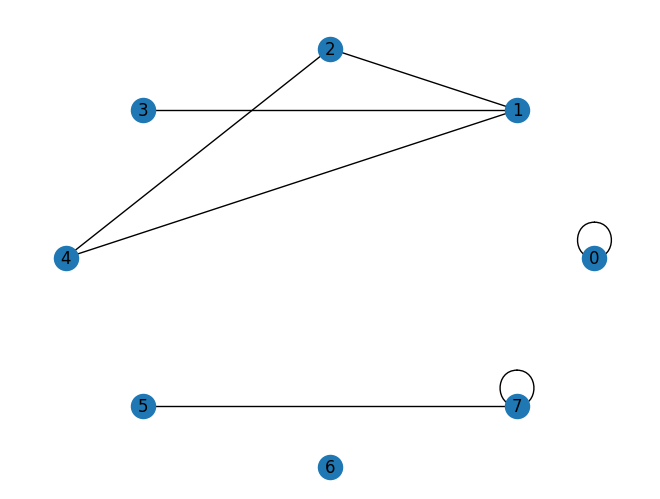

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

n = 8  # Number of nodes
m = 5  # Number of edges
seed = 55  # Seed for random number generator

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

# Add self-loops to the remaining nodes
edgelist = [(0, 0), (7, 7)]
G.add_edges_from(edgelist)

# Circular layout
pos = nx.circular_layout(G)

# Draw the graph with different orientations
nx.draw(G, pos=pos, with_labels=True)
plt.show()


1. Find the vertex set and the edge set of the graph. Give a table showing the edge-endpoint function.

Solution:

$\textbf{Vertex Set} = \{v_0,v_1, v_2, v_3, v_4, v_5, v_6, v_7\}$

$\textbf{Edge Set} = \{e_0,e_1, e_2, e_3, e_4, e_5,e_6\}$

$\textbf{Edge-Endpoint Function}$
\begin{gather}
\begin{bmatrix}
\begin{array}{c|c}
Edge & Endpoints \\
e_0 & \{v_0\} \\
e_1 & \{v_1, v_2\} \\
e_2 & \{v_1,v_3\} \\
e_3 & \{v_1,v_4\} \\
e_4 & \{v_2,v_4\} \\
e_5 & \{v_7\} \\
e_6 & \{v_5,v_7\} \\
\end{array}
\end{bmatrix}
\end{gather}

2. Find all edges that are incident on $v_1$, all vertices that are adjacent to $v_1$, all edges that are adjacent to $e_3$, all loops, all parallel edges, all vertices that are adjacent to themselves, and all isolated vertices.

Solution:

- $e_1, e_2, e_3$ are all incident to $v_1$.

- $v_2, v_3, v_4$ are all adjacent to $v_1$.
  
- $e_1, e_2, e_4$ are all adjacent to $e_3$.

- $e_0, e_5$ are all loops.

- There are no parallel edges.

- $v_0,$ and $v_7$ are adjacent to themselves.

- $v_6$ is an isolated vertex.

$\textbf{2. Directed Graph (Digraphs)}$
-

Using the definition of a Directed Graph:

A directed graph, or digraph, consists of two finite sets: a nonempty set V (G) of vertices and a set D(G) of directed edges, where each is associated with an ordered pair of vertices called its endpoints. If edge e is associated with the pair (v, w) of vertices, then e is said to be the (directed) edge from v to w.

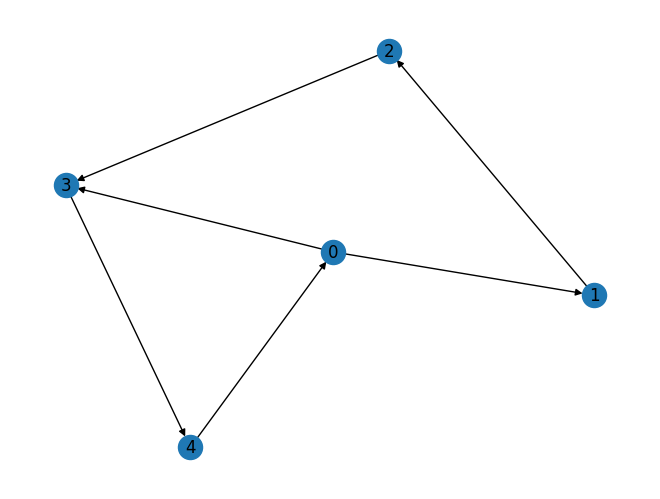

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from([0, 1, 2, 3, 4])

# Add directed edges
edgelist = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (0, 3)]
G.add_edges_from(edgelist)

# Choose layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos=pos, with_labels=True, arrows=True)
plt.show()

The graph is visualized using Matplotlib. Nodes are represented as circles, and directed edges are represented as arrows pointing from the source node to the target node. The labels on the nodes correspond to their numerical identifiers.

$\textbf{3. Simple Graphs}$
-

- A simple graph is a graph that does not have any loops or parallel edges

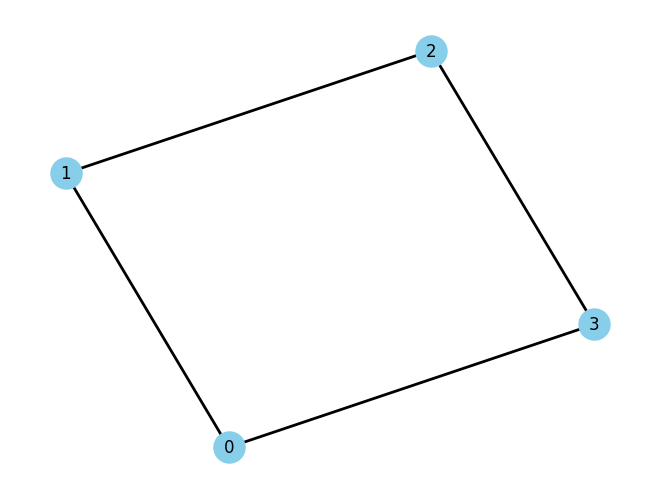

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a simple undirected graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([0, 1, 2, 3])

# Add edges
edgelist = [(0, 1), (1, 2), (2, 3), (3, 0)]
G.add_edges_from(edgelist)

# Choose layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=500, font_size=12, font_color='black', width=2)
plt.show()

$\textbf{4. Complete Graphs}$
-

A complete graph is a undirected graph in which every pair of distinct nodes is connected by a unique edge. Every node in a complete graph is directly connected to every other node in the graph.

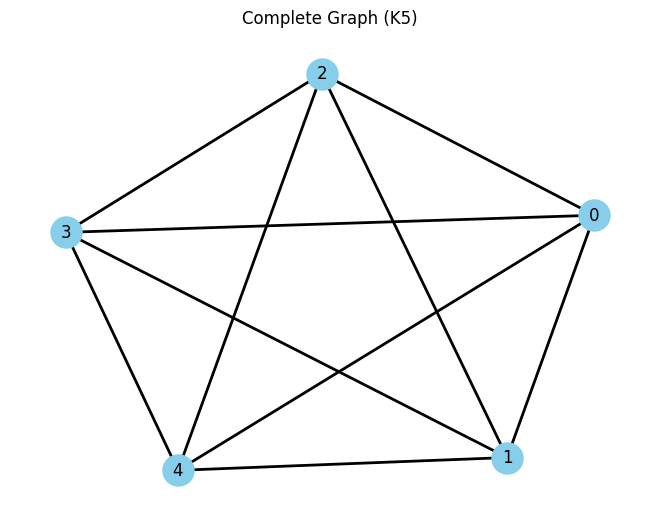

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a complete graph with 5 nodes
G = nx.complete_graph(5)

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=12, font_color='black', width=2)
plt.title("Complete Graph (K5)")
plt.show()

$\textbf{5. Bipartite Graphs}$
-


A bipartite graph is a graph where its vertices can be split into two separate groups in such a way that all edges connect a vertex from one group to a vertex from the other group. This means that no edges connect vertices within the same group.

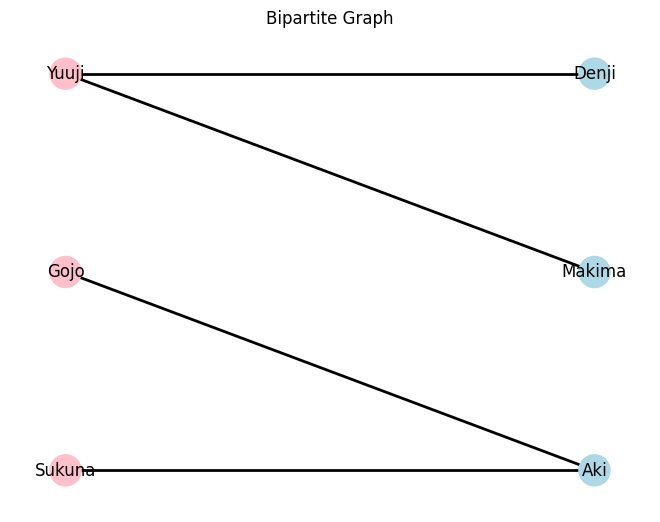

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a bipartite graph
G = nx.Graph()

# Add nodes with the node attribute "bipartite"
G.add_nodes_from(['Gojo', 'Sukuna', 'Yuuji'], bipartite=0)  # Set the "bipartite" attribute to 0 for nodes in the first group
G.add_nodes_from(['Aki', 'Makima', 'Denji'], bipartite=1)  # Set the "bipartite" attribute to 1 for nodes in the second group

# Add edges between nodes from different groups
G.add_edges_from([('Gojo', 'Aki'), ('Sukuna', 'Aki'), ('Yuuji', 'Makima'), ('Yuuji', 'Denji')])

# Separate nodes by group for plotting
top_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
bottom_nodes = set(G) - top_nodes

# Draw the bipartite graph
pos = nx.bipartite_layout(G, top_nodes)
nx.draw(G, pos=pos, with_labels=True, node_color=['pink', 'pink', 'pink', 'lightblue', 'lightblue', 'lightblue'], node_size=500, font_size=12, font_color='black', width=2)
plt.title("Bipartite Graph")
plt.show()

$\textbf{6. Subgraphs}$
-

A subgraph is essentially a smaller graph that is formed by taking a subset of the vertices and edges from a larger graph while maintaining the connections between those vertices as defined by the edges.

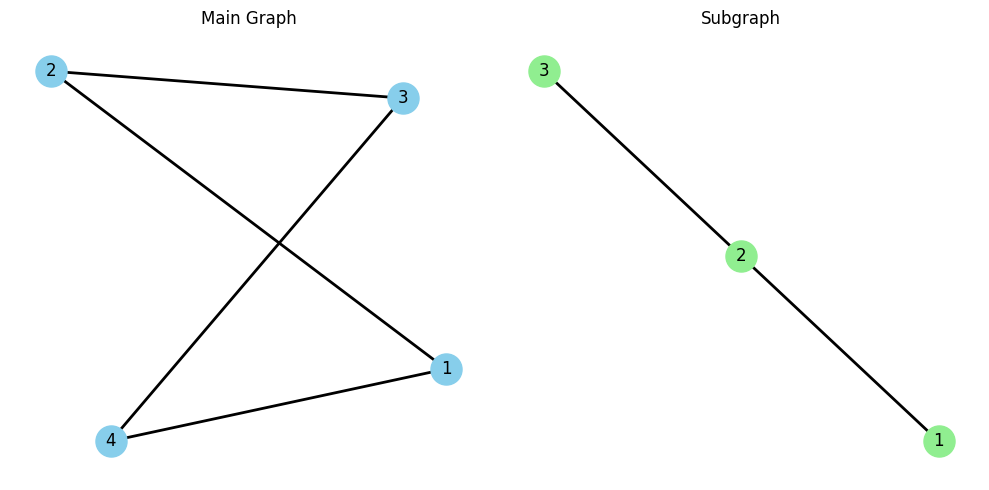

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the main graph
G_main = nx.Graph()
G_main.add_nodes_from([1, 2, 3, 4])
G_main.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Create the subgraph (a subset of nodes and edges from the main graph)
subgraph_nodes = [1, 2, 3]
subgraph_edges = [(1, 2), (2, 3)]
G_sub = nx.Graph()
G_sub.add_nodes_from(subgraph_nodes)
G_sub.add_edges_from(subgraph_edges)

# Draw the main graph
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G_main, with_labels=True, node_color='skyblue', node_size=500, font_size=12, font_color='black', width=2)
plt.title("Main Graph")

# Draw the subgraph
plt.subplot(122)
nx.draw(G_sub, with_labels=True, node_color='lightgreen', node_size=500, font_size=12, font_color='black', width=2)
plt.title("Subgraph")

plt.tight_layout()
plt.show()

$\textbf{7. Degree of a Vertex}$
-

The degree of a vertex in a graph is the number of edges incident to that vertex.

Vertex	Degree
1	2
2	3
3	3
4	2
Total degrees: 10


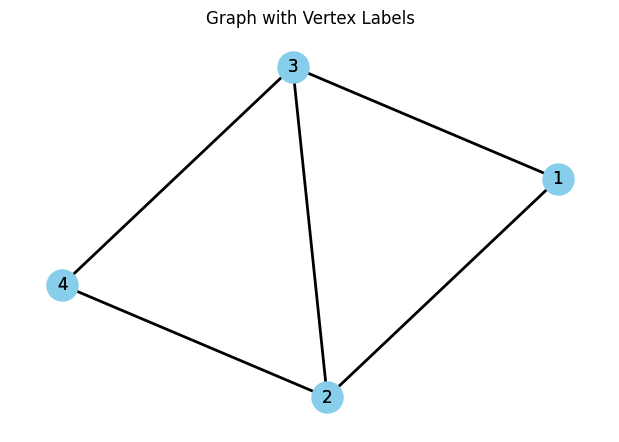

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

# Calculate the degree of each vertex
degrees = dict(G.degree())
total_degrees = sum(degrees.values())

# Print the table with degree numbers per vertex and the total amount of degrees
print("Vertex\tDegree")
for vertex, degree in degrees.items():
    print(f"{vertex}\t{degree}")
print(f"Total degrees: {total_degrees}")

# Draw the graph with only vertex labels
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=12, font_color='black', width=2)
nx.draw_networkx_labels(G, pos)
plt.title("Graph with Vertex Labels")
plt.show()

$\textbf{8. The Handshake Theorem}$
-

The Handshake Theorem states that in any finite undirected graph, the sum of the degrees of all vertices is equal to twice the number of edges in the graph. Mathematically, it can be expressed as:

$\sum_{v \in V} \text{degree}(v) = 2|E|$

Now using that in reference to the graph from the degree of vertex:

$\sum_{v \in V} \text{degree}(v) = 10$

$2|E| = 2 $x$ 5 = 10$

Thus, the Handshake Theorem holds true for this example graph.

$\textbf{9. Travelling in a Graph}$
-
In graph theory, traversal involves moving between vertices by following a sequence of adjacent edges. With the given graph, various methods of traversal were employed to navigate through it.

A walk, is a sequence of vertices and edges that alternately follow each other in a graph. A walk can repeat vertices and edges, and it can also revisit the same vertex multiple times. 

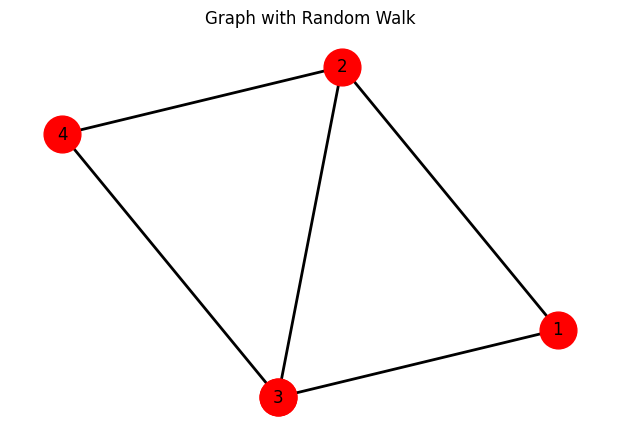

Random Walk: [4, 3, 2, 3, 1]


In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Create a graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

# Perform a random walk
current_node = random.choice(list(G.nodes()))
walk = [current_node]
while len(walk) < 5:  # Perform 5 steps for demonstration
    neighbors = list(G.neighbors(current_node))
    if not neighbors:
        break  # Stop if no neighbors available
    next_node = random.choice(neighbors)
    walk.append(next_node)
    current_node = next_node

# Plot the graph with the walk
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=12, font_color='black', width=2)
nx.draw_networkx_nodes(G, pos, nodelist=walk, node_color='red', node_size=700)  # Highlight the nodes in the walk
plt.title("Graph with Random Walk")
plt.show()

print("Random Walk:", walk)

A $\textbf{trail from v to w}$ is a walk  from $v$ to $w$ that does not contain a repeated edge.

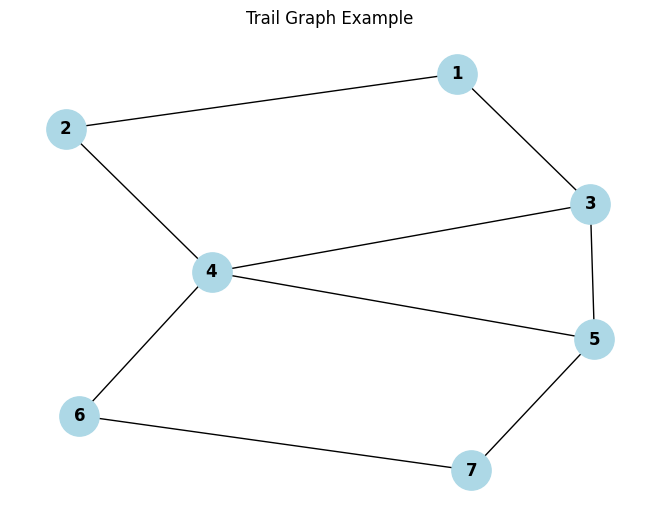

Trail: [1, 2, 4, 3, 5, 7, 6]


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges to the graph representing streets between intersections
streets = [(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 7), (6, 7)]

# Add edges to the graph
G.add_edges_from(streets)

# Function to find a trail using Depth-First Search
def dfs_trail(graph, start, visited=None, trail=None):
    if visited is None:
        visited = set()
    if trail is None:
        trail = []

    visited.add(start)
    trail.append(start)

    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            dfs_trail(graph, neighbor, visited, trail)

    return trail

# Find a trail starting from intersection 1
trail = dfs_trail(G, 1)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800)
plt.title("Trail Graph Example")
plt.show()

print("Trail:", trail)

A $\textbf{path from v to w}$ is a walk  from $v$ to $w$ that does not contain a repeated vertex.

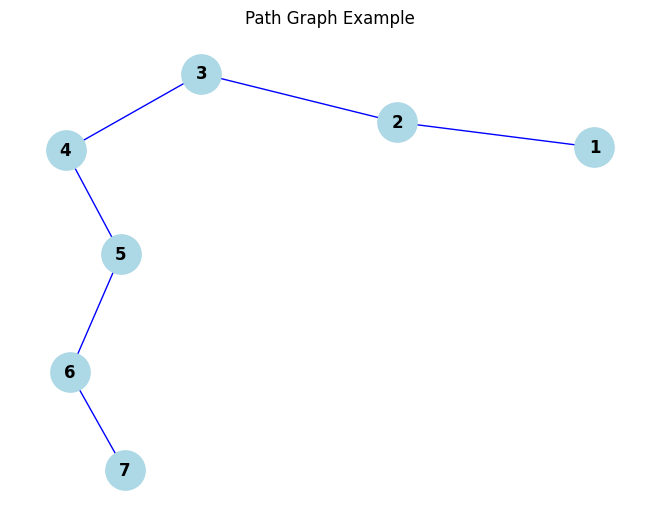

Path: [1, 2, 3, 4, 5, 6, 7]


In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)])

# Define the path
path = [1, 2, 3, 4, 5, 6, 7]

# Draw the graph without arrows but with edge color differentiation
pos = nx.spring_layout(G)  # Layout for visualization

# Draw edges with different colors to indicate direction
edge_colors = ['blue' if (path[i], path[i+1]) in G.edges else 'red' for i in range(len(path)-1)]

nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800, arrows=False, edge_color=edge_colors)
plt.title("Path Graph Example")
plt.show()

print("Path:", path)

A $\textbf{closed walk}$ is a walk  from $v$ to $w$ that starts and ends in the same vertex.

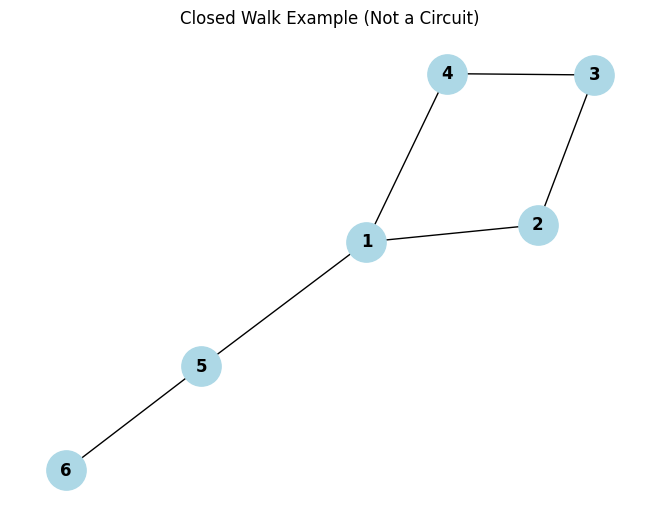

Closed Walk Sequence: [1, 2, 3, 4, 1, 5, 6, 5, 1]


In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 5), (5, 6)])

# Define a closed walk sequence
closed_walk_sequence = [1, 2, 3, 4, 1, 5, 6, 5, 1]

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800)
plt.title("Closed Walk Example (Not a Circuit)")
plt.show()


print("Closed Walk Sequence:", closed_walk_sequence)

A $\textbf{circuit}$ is a closed walk that contains at least one edge and does not contain a repeated edge.

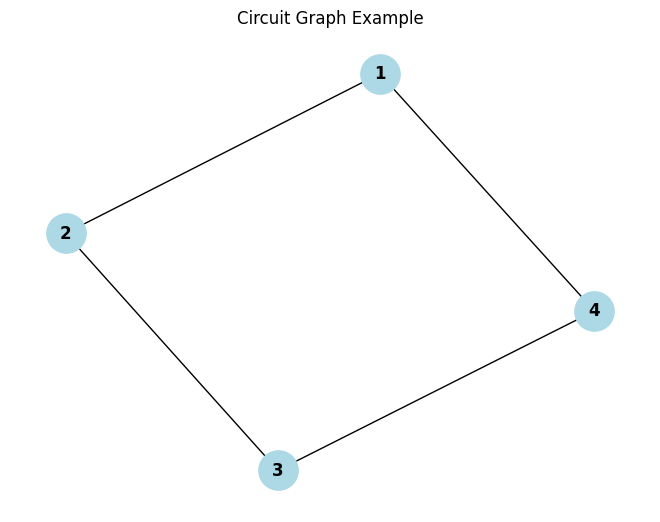

Circuit Sequence: [1, 2, 3, 4, 1]


In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges to the graph forming a circuit
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Define the circuit sequence
circuit_sequence = [1, 2, 3, 4, 1]

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800)
plt.title("Circuit Graph Example")
plt.show()

print("Circuit Sequence:", circuit_sequence)

A $\textbf{simple circuit}$ is a circuit that does not have any other repeated except the first and the last.

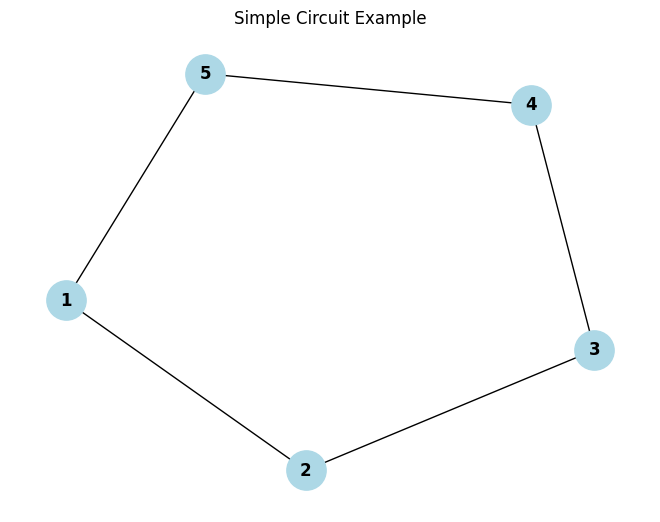

Circuit Sequence: [1, 2, 3, 4, 5, 1]


In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges to the graph forming a simple circuit
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# Define the circuit sequence
circuit_sequence = [1, 2, 3, 4, 5, 1]

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800)
plt.title("Simple Circuit Example")
plt.show()

print("Circuit Sequence:", circuit_sequence)

$\textbf{10. Connectedness a Graph}$
-

A connected graph is one where every pair of vertices is linked by a path. This means that you can travel from any vertex to any other vertex along a sequence of edges.

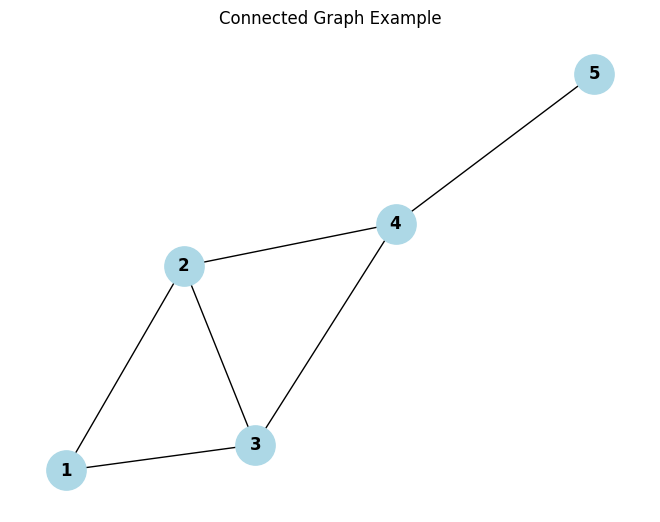

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a connected graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800)
plt.title("Connected Graph Example")
plt.show()

$\textbf{11. Connected Components}$
-

A graph $H$ is a $\textbf{connected component}$ of a graph $G$ $\iff$:
- $H$ is a subgraph of $G$.
- $H$ is connected.
- No connected subgraphs of $G$ has $H$ as a subgraphs and contains vertices or edges that are not in $H$.

Connected components:
Component 1: {1, 2, 3}
Component 2: {4, 5}


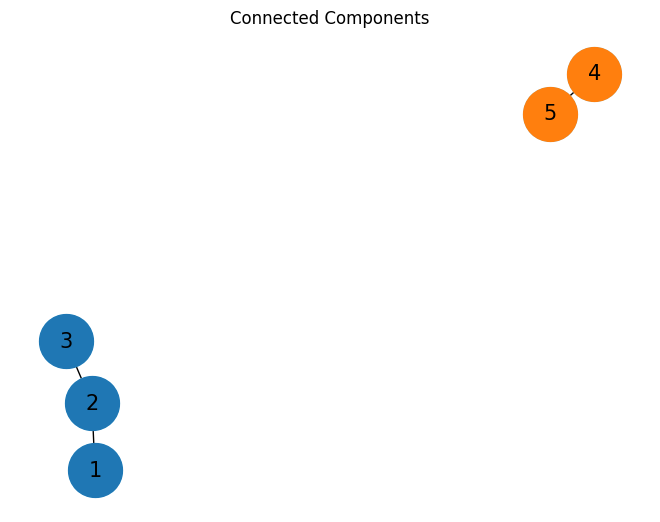

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (4, 5)])

# Find connected components
connected_components = list(nx.connected_components(G))

# Print and visualize connected components
print("Connected components:")
for i, component in enumerate(connected_components):
    print(f"Component {i+1}: {component}")

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, edge_color="black", linewidths=1, font_size=15)

# Draw connected components with different colors
for i, component in enumerate(connected_components):
    nx.draw_networkx_nodes(G, pos, nodelist=component, node_color=f"C{i}", node_size=1500)

# Show the graph
plt.title("Connected Components")
plt.show()

$\textbf{12. Euler's Circuit}$
-

A graph is a Euler's Circuit if it satisfies these conditions:
- if every vertex in the graph has an even degree.
- if the graph is connected

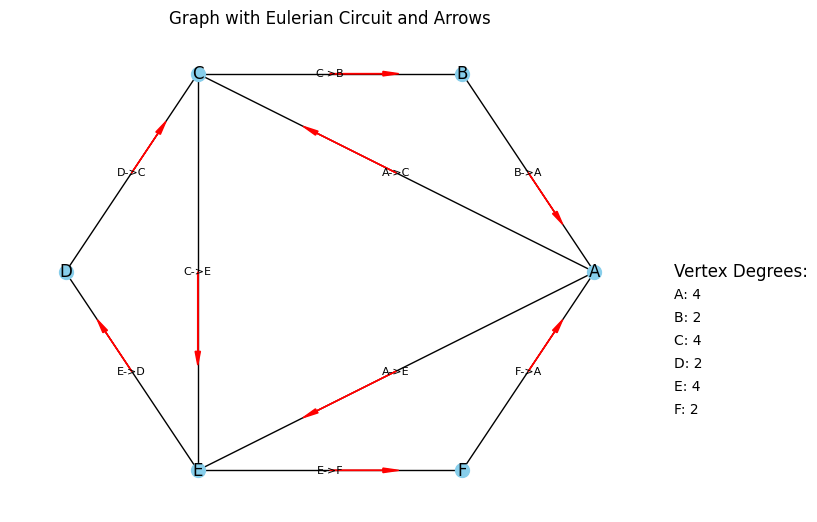

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
node_names = ['A', 'B', 'C', 'D', 'E', 'F']
edge_list = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "E"), ("E", "F"), ("F", "A"), ("A", "C"), ("C", "E"), ("A", "E")]
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edge_list)

# Find Eulerian circuit
euler_circuit = list(nx.eulerian_circuit(G))

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100)

# Draw arrows and add edge labels
for u, v in euler_circuit:
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    dx = x1 - x0
    dy = y1 - y0
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2
    arrow_length_factor = 0.2
    plt.arrow(mid_x, mid_y, dx * arrow_length_factor, dy * arrow_length_factor, head_width=0.02, head_length=0.06, fc='red', ec='red')
    plt.text(mid_x, mid_y, f"{u}->{v}", fontsize=8, ha='center', va='center', color='black')

# Show the graph
plt.title("Graph with Eulerian Circuit and Arrows")

# Collect vertex degrees
vertex_degrees = {node: G.degree[node] for node in G.nodes()}

# Print vertex degrees
plt.text(1.3, 0, "Vertex Degrees:", ha='left', va='center', fontsize=12)
for node, degree in vertex_degrees.items():
    plt.text(1.3, -0.1 - 0.1 * (ord(node) - ord('A')), f"{node}: {degree}", ha='left', va='center', fontsize=10)

plt.show()


$\textbf{13. Euler's Trail}$
-

A graph is a Euler's Trail if it satisfies these conditions: 
- $v$ and $w$ have odd degree, and all other vertices of $G$ has a positive even degree. 
- The graph is connected

Starting Node: C
Ending Node: F


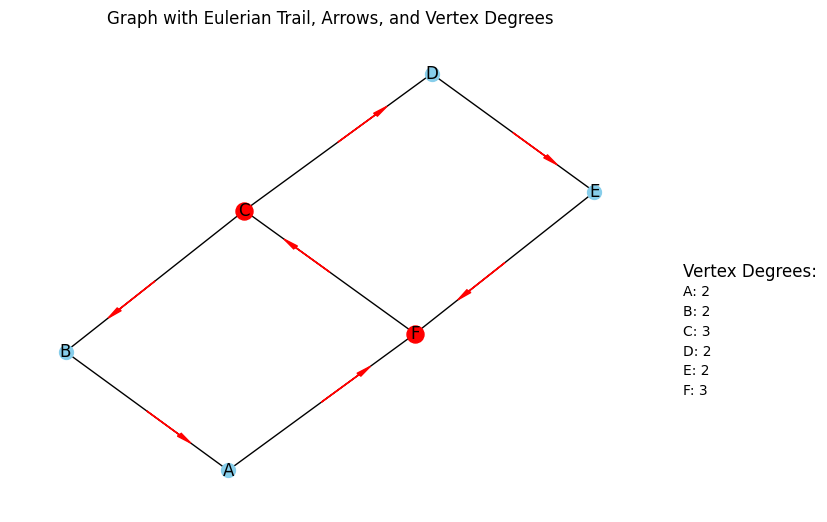

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

node_names = ['A', 'B', 'C', 'D', 'E', 'F']
edge_list = [('A', 'B'), ('A', 'F'), ('C', 'B'), ('C', 'D'), ('C', 'F'), ('E', 'D'), ('E', 'F')]
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edge_list)

euler_path = list(nx.eulerian_path(G))
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=100)

# Draw arrows for the Eulerian path
for u, v in euler_path:
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    dx = x1 - x0
    dy = y1 - y0
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2
    arrow_length_factor = 0.2
    plt.arrow(mid_x, mid_y, dx * arrow_length_factor, dy * arrow_length_factor, head_width=0.02, head_length=0.06, fc='red', ec='red')

# Add vertex degrees
vertex_degrees = {node: G.degree[node] for node in G.nodes()}
plt.text(1.3, 0, "Vertex Degrees:", ha='left', va='center', fontsize=12)
for node, degree in G.degree():
    plt.text(1.3, -0.1 - 0.1 * (ord(node) - ord('A')), f"{node}: {degree}", ha='left', va='center', fontsize=10)
# Highlight the starting and ending nodes
starting_node = euler_path[0][0]
ending_node = euler_path[-1][1]
nx.draw_networkx_nodes(G, pos, nodelist=[starting_node, ending_node], node_color='red', node_size=150)

print("Starting Node:", euler_path[0][0])
print("Ending Node:", euler_path[-1][1])

plt.title("Graph with Eulerian Trail, Arrows, and Vertex Degrees")
plt.show()

$\textbf{14. Hamiltonian Circuits}$
-
A graph is a Hamiltonian Circuit if it satisfies these conditions: 

- The path contains every subgraph of the original graph
- The path is connected
- The path has the same number of edges as vertices
- Every vertex of the path has degree 2

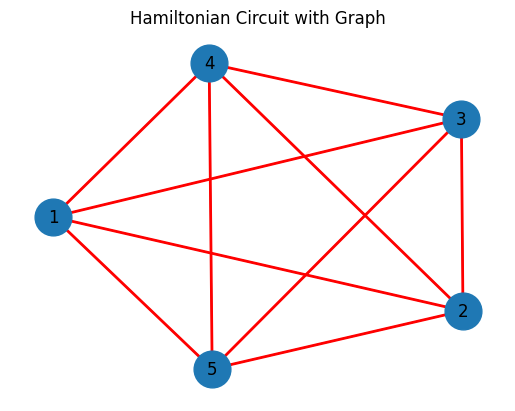

Hamiltonian Cycle: [1, 5, 4, 3, 5, 2, 4, 1, 3, 2, 1]


In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)])

# Check if the graph is connected and Eulerian
if nx.is_connected(G) and nx.is_eulerian(G):
    # Find an Eulerian circuit
    eulerian_circuit = list(nx.eulerian_circuit(G))
    
    # Convert Eulerian circuit to Hamiltonian cycle
    hamiltonian_cycle = [node for node, _ in eulerian_circuit] + [eulerian_circuit[0][0]]
    
    # Plot the graph
    pos = nx.spring_layout(G)  # Positions for all nodes

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw labels
    nx.draw_networkx_labels(G, pos)

    # Draw Hamiltonian cycle
    nx.draw_networkx_edges(G, pos, edgelist=[(hamiltonian_cycle[i], hamiltonian_cycle[i+1]) for i in range(len(hamiltonian_cycle)-1)], edge_color='r', width=2)

    # Display the graph
    plt.title("Hamiltonian Circuit with Graph")
    plt.axis('off')
    plt.show()

    # Print the Hamiltonian cycle
    print("Hamiltonian Cycle:", hamiltonian_cycle)

$\textbf{15. The Travelling Salesman Problem}$
---

- The general traveling salesman problem involves finding a Hamiltonian circuit to minimize the total distance traveled for an arbitrary graph with n vertices in which each edge is marked with a distance.

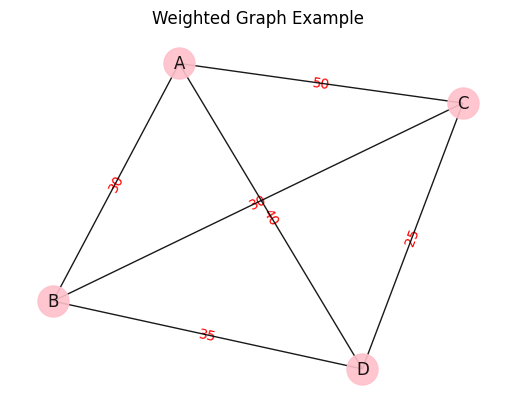

In [31]:
import matplotlib.pyplot as plt
import networkx as nx

# Use seed for reproducibility
seed = 55

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D"])

# Add edges with weights
edgelist = [("A", "B", 30), ("A", "C", 50), ("A", "D", 40), ("B", "C", 30), ("B", "D", 35), ("C", "D", 25)]
G.add_weighted_edges_from(edgelist)

# Define layout
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout

# Draw edges with labels
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={('A', 'B'): '30',
                 ('A', 'C'): '50',
                 ('A', 'D'): '40',
                 ('B', 'C'): '30',
                 ('B', 'D'): '35',
                 ('C', 'D'): '25'},
    font_color='red'
)

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)

plt.title('Weighted Graph Example')
plt.show()

Routes:

$A \to B \to C \to D \to A =  105$

$A \to B \to D \to C \to A = 140$

$A \to C \to B \to D \to A = 155$

$A \to C \to D \to B \to A = 140$

$A \to D \to B \to C \to A = 155$

$A \to D \to C \to B \to A = 125$

Best route is $A \to B \to C \to D \to A =  105$